# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [3]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[(data['Gender'] == 'Male')]
female_df =  data.loc[(data['Gender'] == 'Female')]

print(f'Male Height mean: {male_df.Height.mean()}')
print(f'Male Height mean: {male_df.Height.std()}')
print(f'Male Weight mean: {male_df.Weight.mean()}')
print(f'Male Weight mean: {male_df.Weight.std()}')

print(f'Female Height mean: {female_df.Height.mean()}')
print(f'Female Height mean: {female_df.Height.std()}')
print(f'Female Weight mean: {female_df.Weight.mean()}')
print(f'Female Weight mean: {female_df.Weight.std()}')

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height mean: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight mean: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height mean: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight mean: 19.022467805319028


In [4]:
male_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

<function matplotlib.pyplot.show(*args, **kw)>

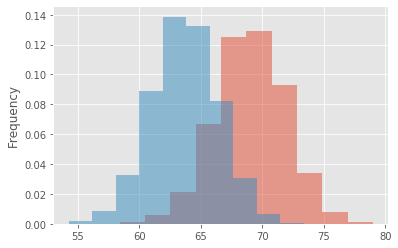

In [20]:
plt.figure(figsize=(6,4))
plt.ylabel('Frequency')

# note density has to be true so you can get a density function, rather than a frequency function
male_df.Height.hist(alpha=0.5, bins=10, label='Male Height', density = True) 
female_df.Height.hist(alpha=0.5, bins=10, label='Female Height', density = True)

plt.legend
plt.show

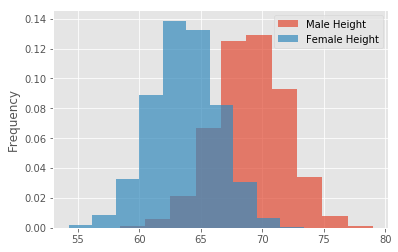

In [17]:
# Your code here

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

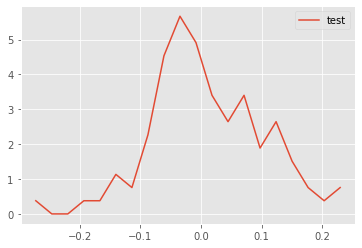

In [8]:
def density(x):
    n, bins = np.histogram(x, 20, density = True)
    pdfx = [0.5*(bins[k]+bins[k+1]) for k in range(n.size)]
    pdfy = [n[k] for k in range(n.size)]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

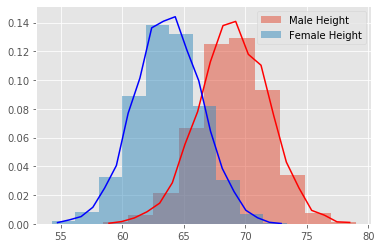

In [25]:
# Your code here 
plt.figure(figsize=(6,4))

male_df.Height.hist(alpha=0.5, bins=10, label='Male Height', density = True)
female_df.Height.hist(alpha=0.5, bins=10, label='Female Height', density = True)

x,y = density(male_df.Height)
plt.plot(x,y, color='red')
i, j = density(female_df.Height)
plt.plot(i, j, color = 'blue')

plt.legend()

plt.show()

## Repeat the above exercise for male and female weights

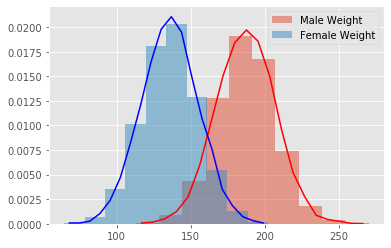

In [36]:
# Your code here 
plt.figure(figsize=(6,4))

male_df.Weight.hist(alpha=0.5, bins=10, label='Male Weight', density = True)
female_df.Weight.hist(alpha=0.5, bins=10, label='Female Weight', density = True)

x,y = density(male_df.Weight)
plt.plot(x,y, color='red')
i, j = density(female_df.Weight)
plt.plot(i, j, color = 'blue')

plt.legend()

plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?

# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

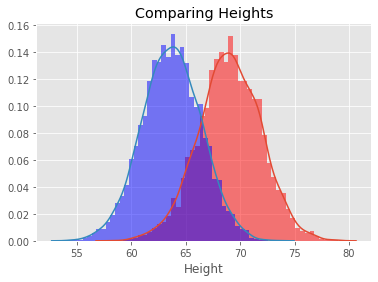

In [38]:
import seaborn as sns
# Code for heights here
sns.distplot(male_df.Height, 
             hist=True, 
             hist_kws={
                       "linewidth" : 2,
                       "color" : 'red',
                        "alpha" : 0.5
             })
sns.distplot(female_df.Height, 
             hist=True, 
             hist_kws={
                       "linewidth" : 2,
                       "color" : 'blue',
                        "alpha" : 0.5
             })

plt.title('Comparing Heights')
plt.show()


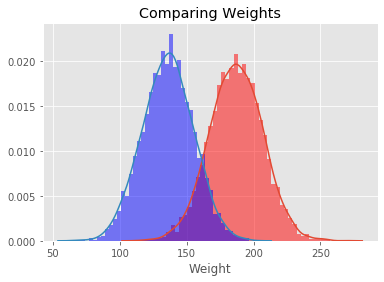

In [39]:
# Code for weights here
sns.distplot(male_df.Weight, 
             hist=True, 
             hist_kws={
                       "linewidth" : 2,
                       "color" : 'red',
                        "alpha" : 0.5
             })
sns.distplot(female_df.Weight, 
             hist=True, 
             hist_kws={
                       "linewidth" : 2,
                       "color" : 'blue',
                        "alpha" : 0.5
             })
plt.title('Comparing Weights')
plt.show()

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.